In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: 0934200401_M13grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.798e-03 +/- 9.993e-04 (77.6 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-11
  Telescope: XMM Instrument: EMOS1  Channel Type: PI
  Exposure Time: 7901 sec
 Using fit statistic: chi
 Using Background File                0934200401_M13spec_bkg.fits
  Background Exposure Time: 7901 sec
 Using Response (RMF) File            0934200401_M13spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0934200401_M13spec.arf



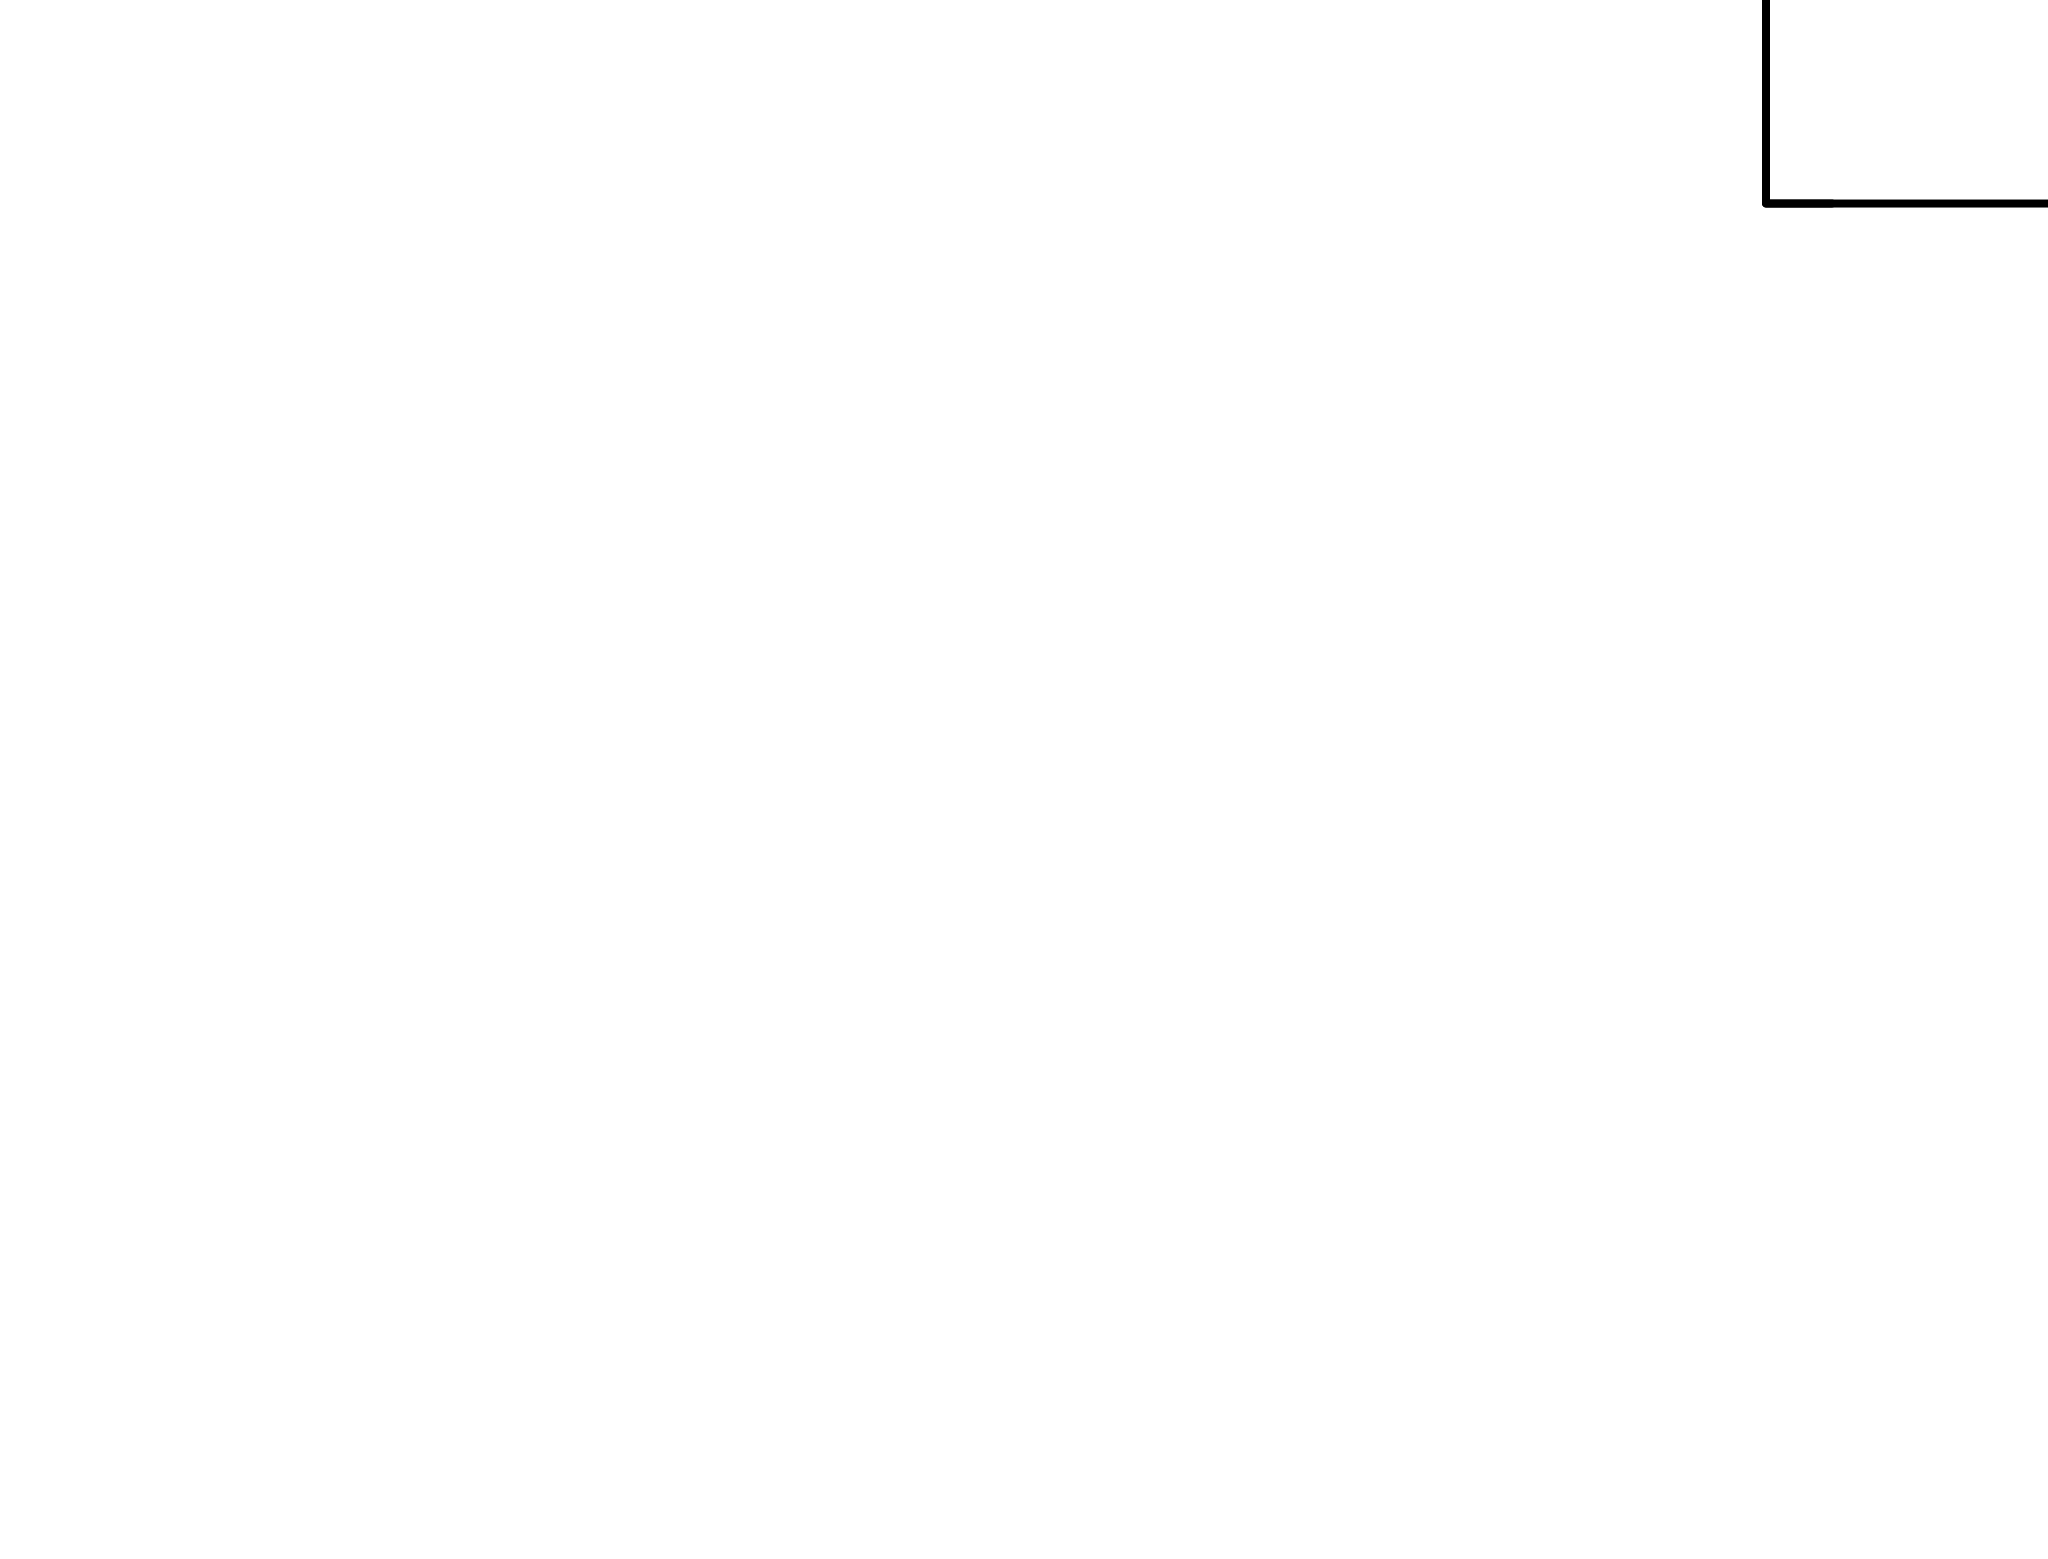

     1 channels (1) ignored in spectrum #     1
      No channels ignored (no channels in specified range)



In [2]:
spec_fnames = glob.glob('*M13grpspec.fits')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              3.643704e+10     using 10 bins.


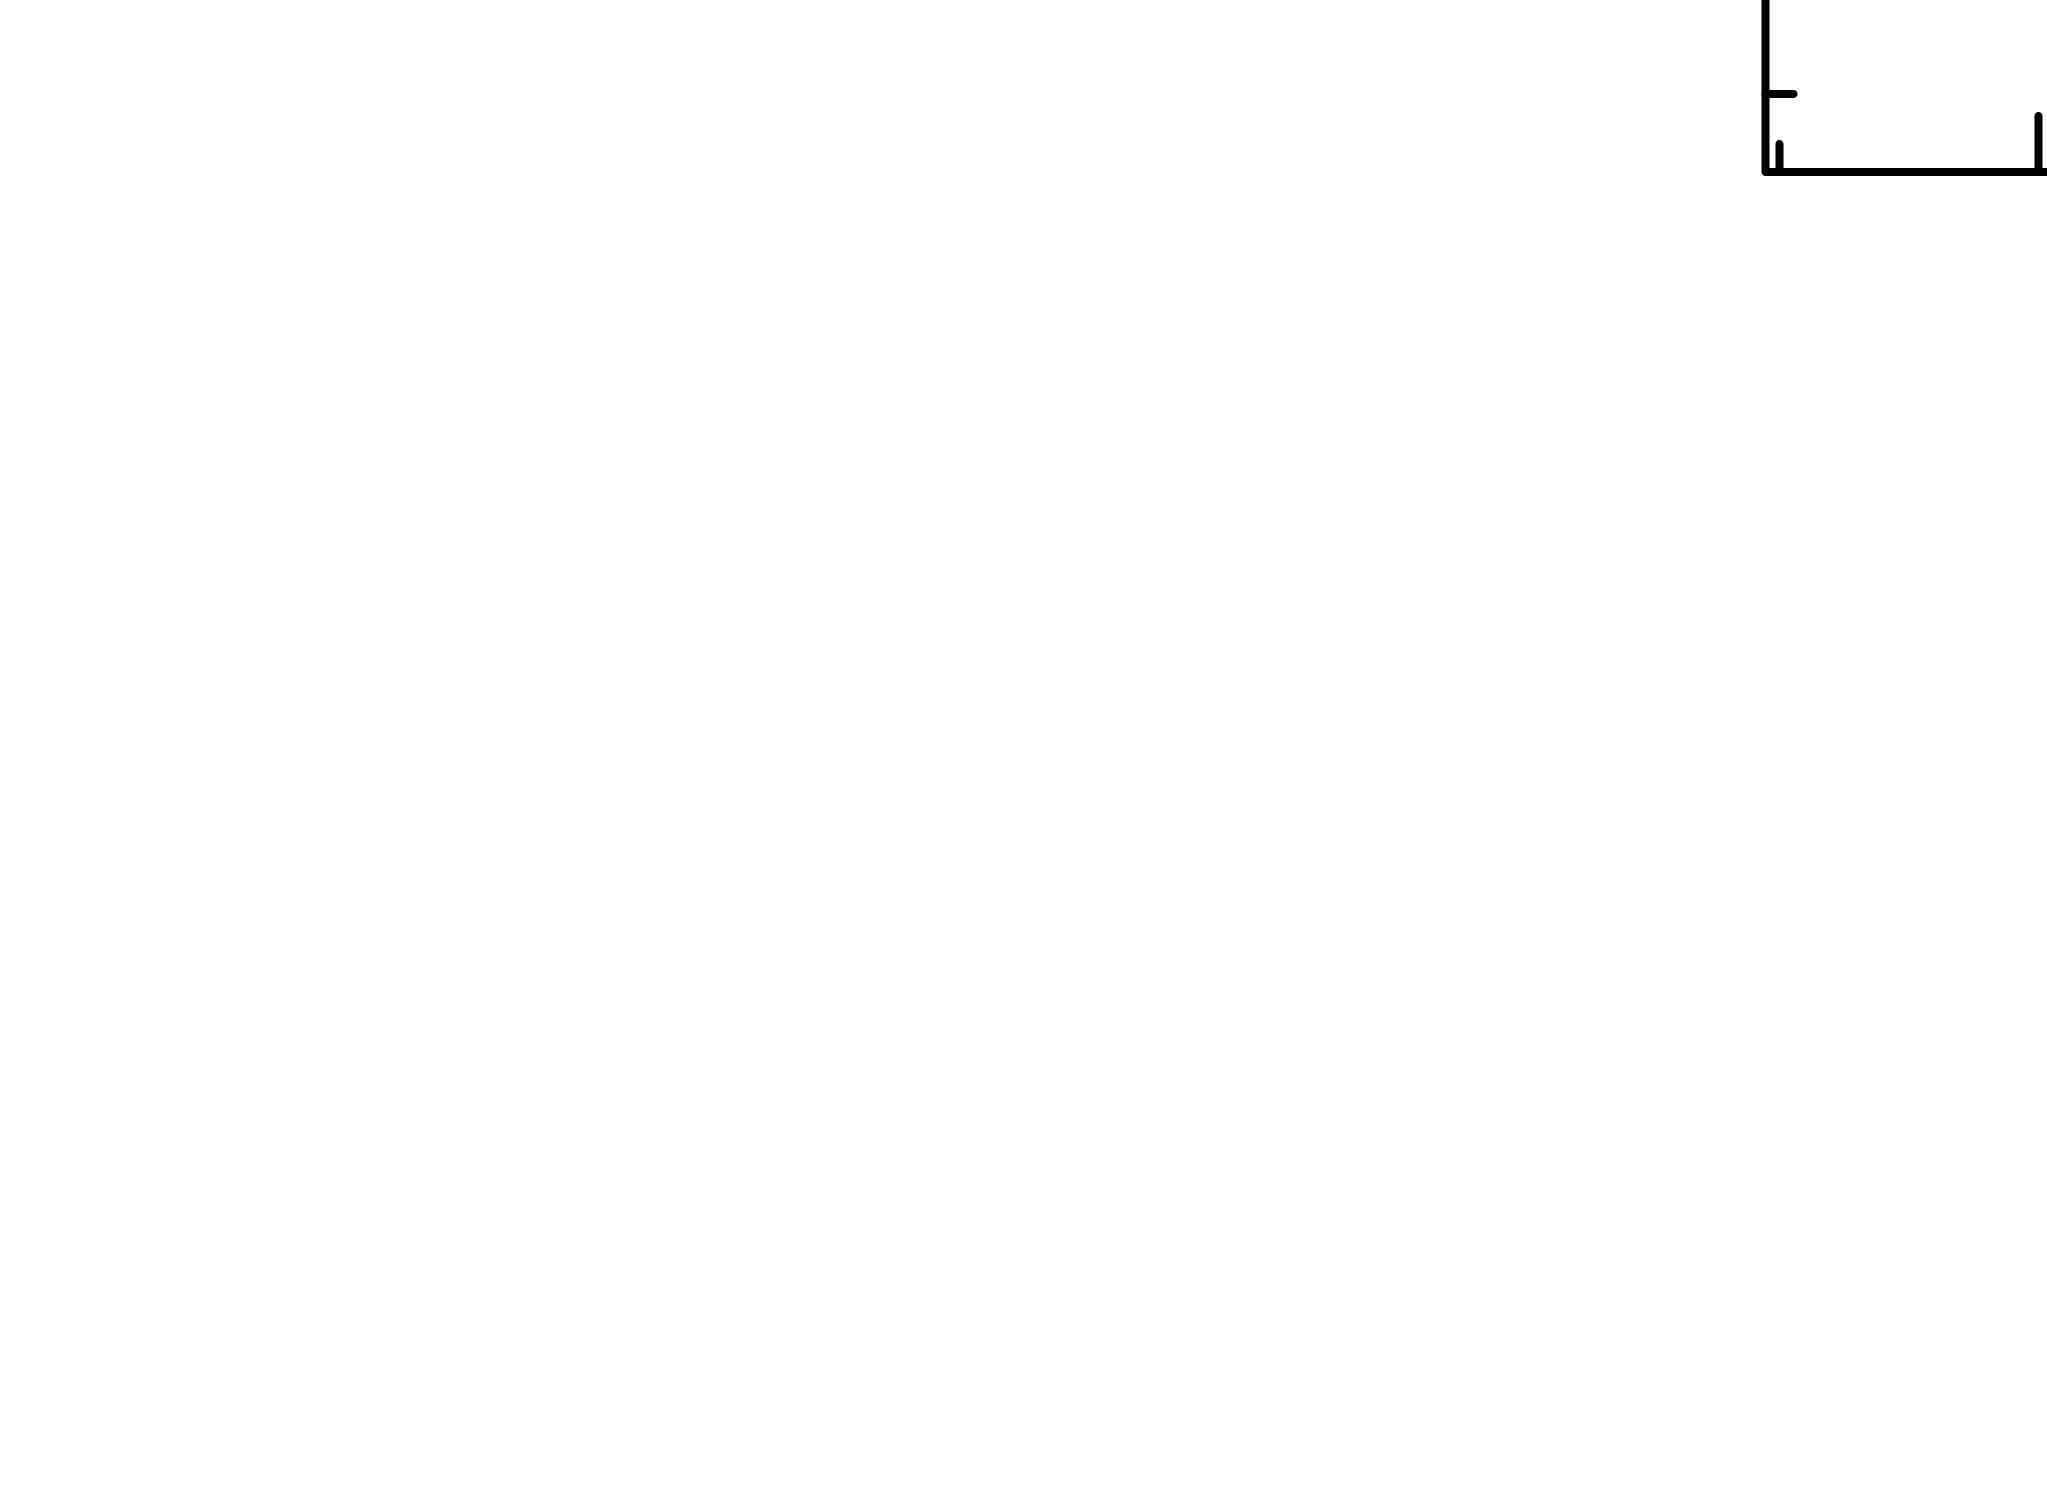

In [3]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.319107e+09     using 10 bins.

Test statistic : Chi-Squared              7.319107e+09     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 7 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
14.8329      1.53047      -3       1.33066       27.4409   4.43949e-05
9.56671      43407        -4       2.56153       42.5029   9.46623e-05
9.12924      10456.6      -1       2.61233       20.3657   9.40141e-05
8

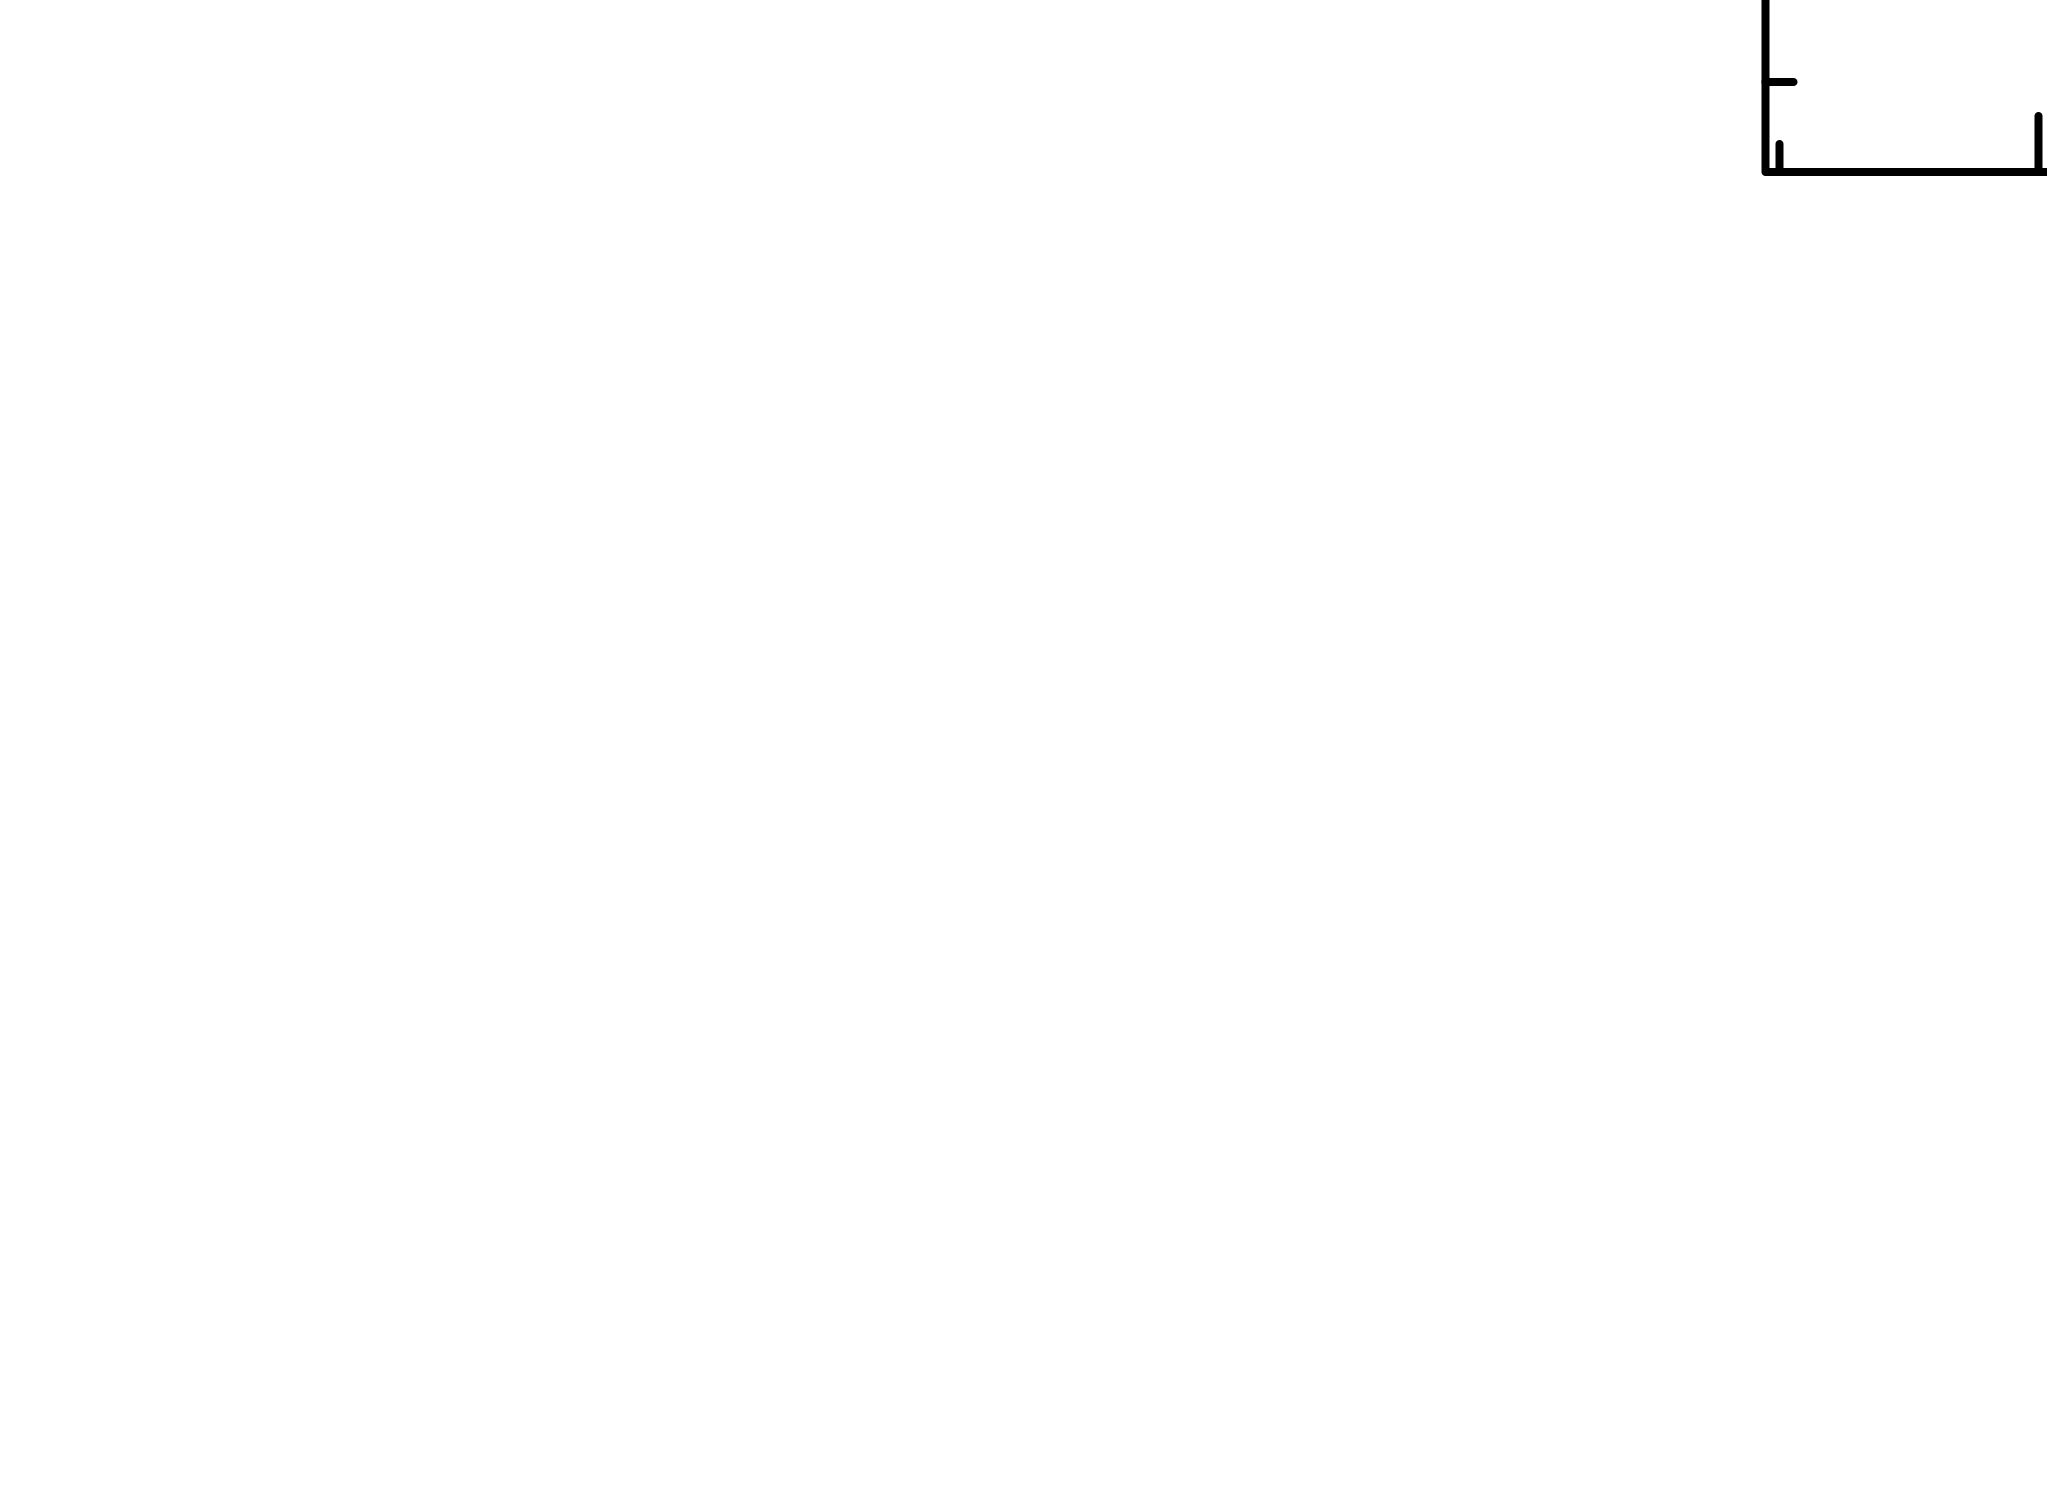

In [4]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              2.592789e+09     using 10 bins.

Test statistic : Chi-Squared              2.592789e+09     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 7 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
30.8443      0.938816     -2      0.465881       9.96667   1

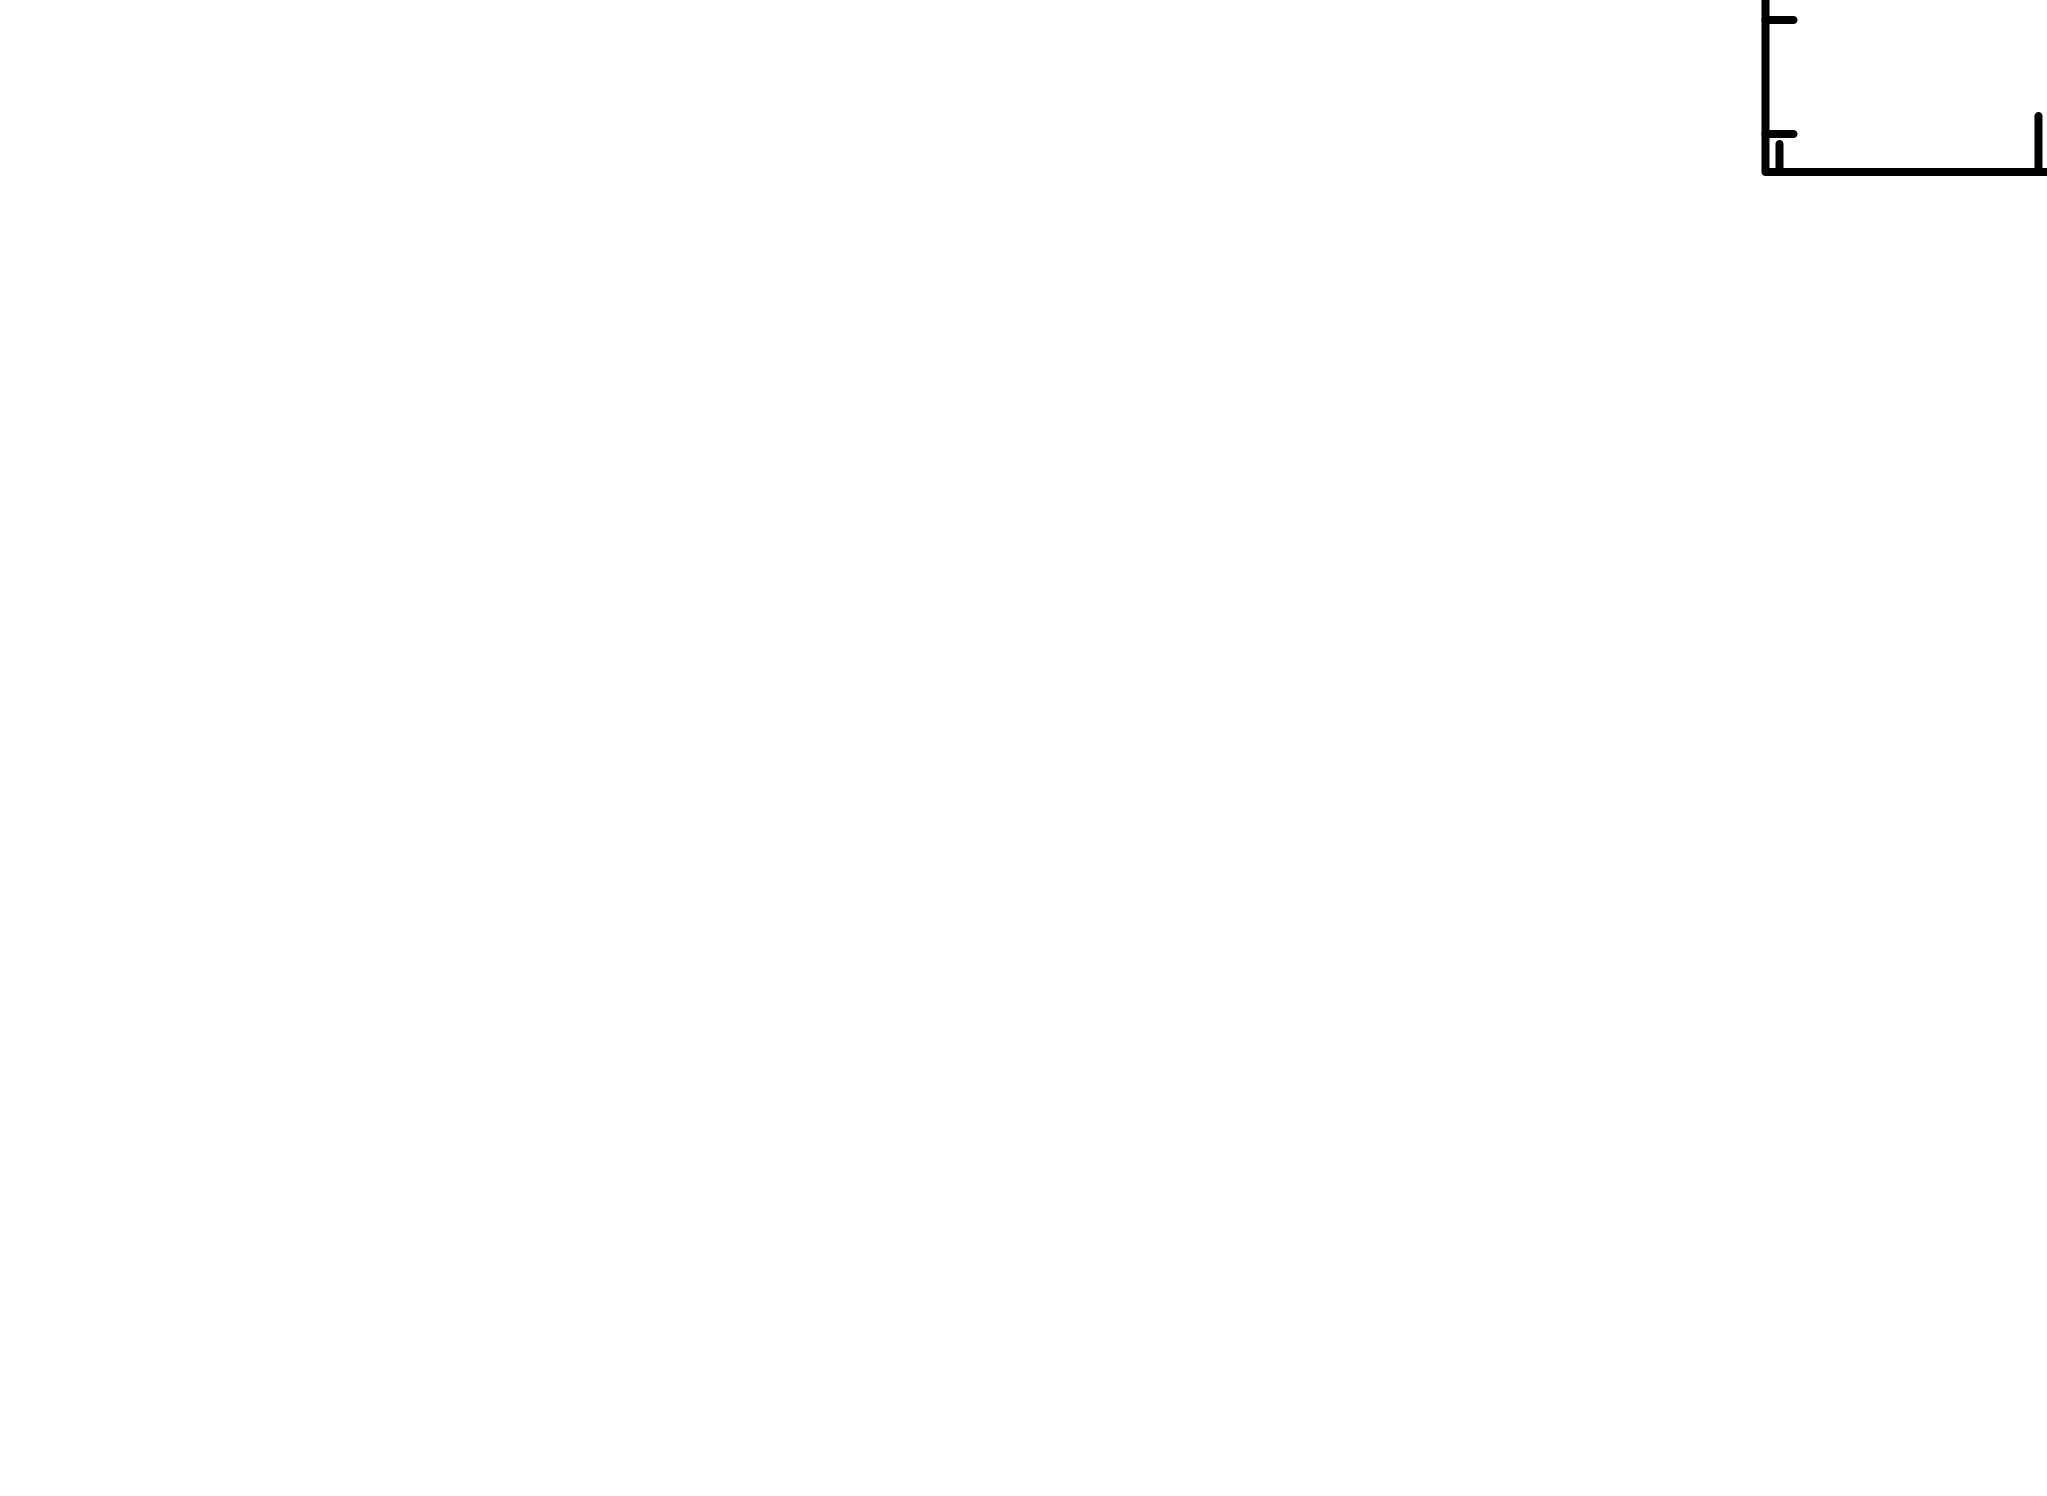

In [5]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.353427e+11     using 10 bins.

Test statistic : Chi-Squared              1.353427e+11     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 7 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
13.4192      0.584057     -1      0.454435       2.68366   8.11621e-06
10.7572      149931       -1     0.0315261       1.99527   5.91071e-06
9.21132      74613.7      -1      0.496289       1.69777   5.02787e-06
8.

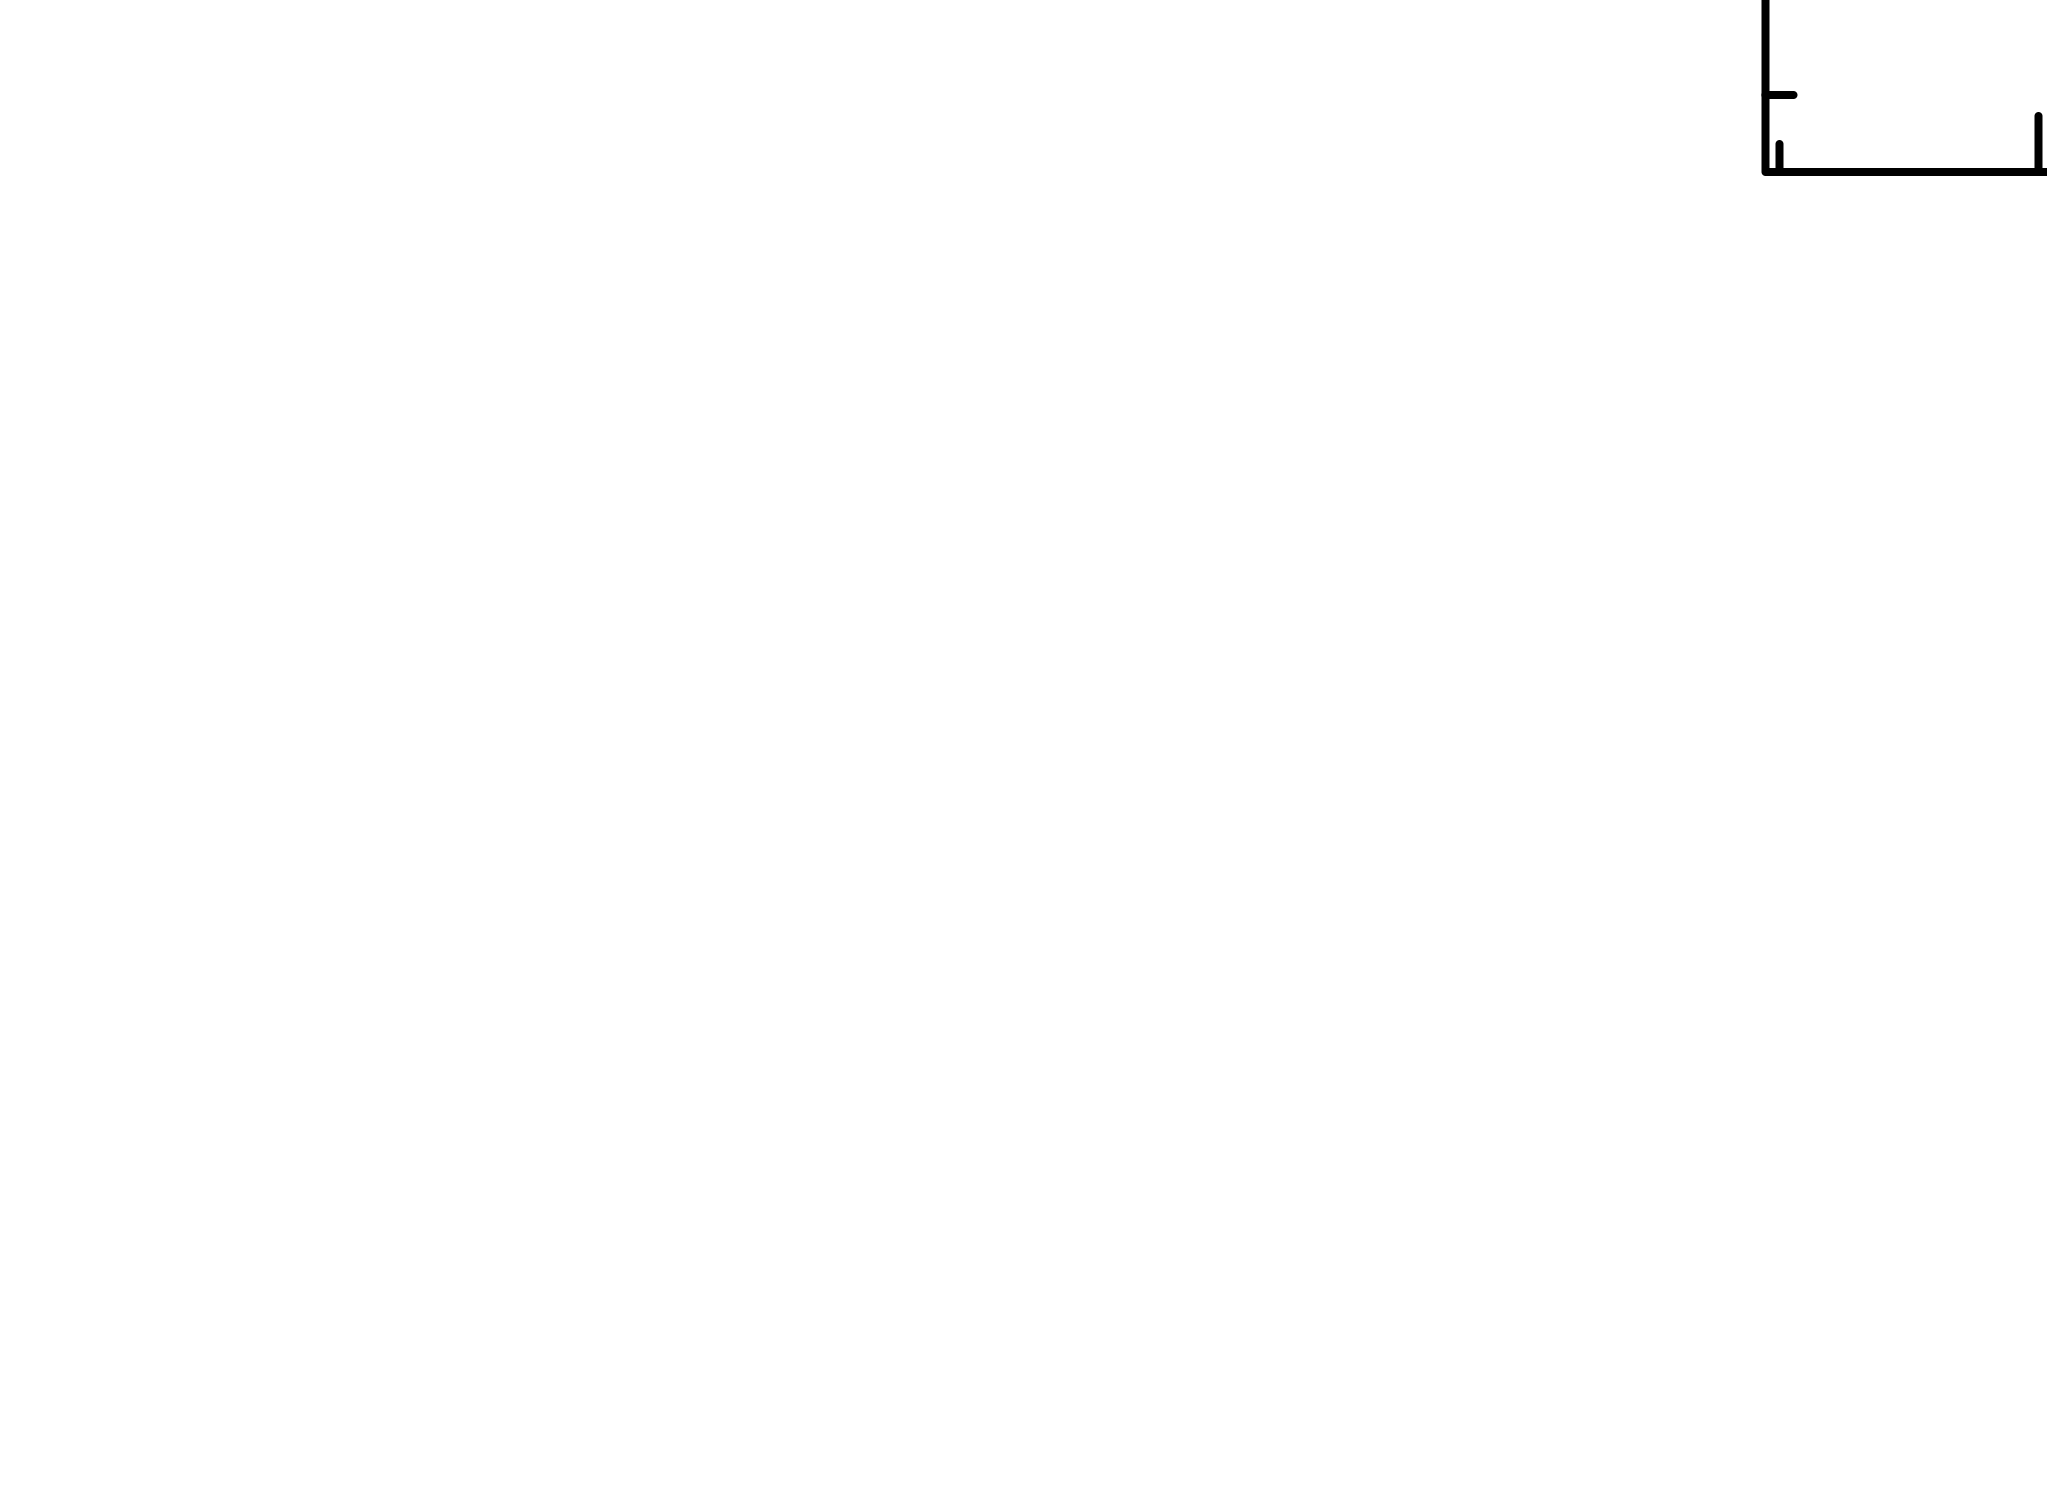

In [6]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".2 12.0")

 Model Flux 4.2768e-05 photons (2.8918e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [8]:
plx = 1.0285
d_kpc = 1/plx
F_x = 2.8918*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

3.2699502421452203e+31


In [9]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

0.9722897423432183
31.514541144181333


In [10]:
F_opt = 1.05*10**-5 * 10**(-0.4*18.35)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  4.79942599095618e-13
F_x / F_opt:  -0.2200210456825544



Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.037153e+10     using 10 bins.

Test statistic : Chi-Squared              1.037153e+10     using 10 bins.
 Null hypothesis probability

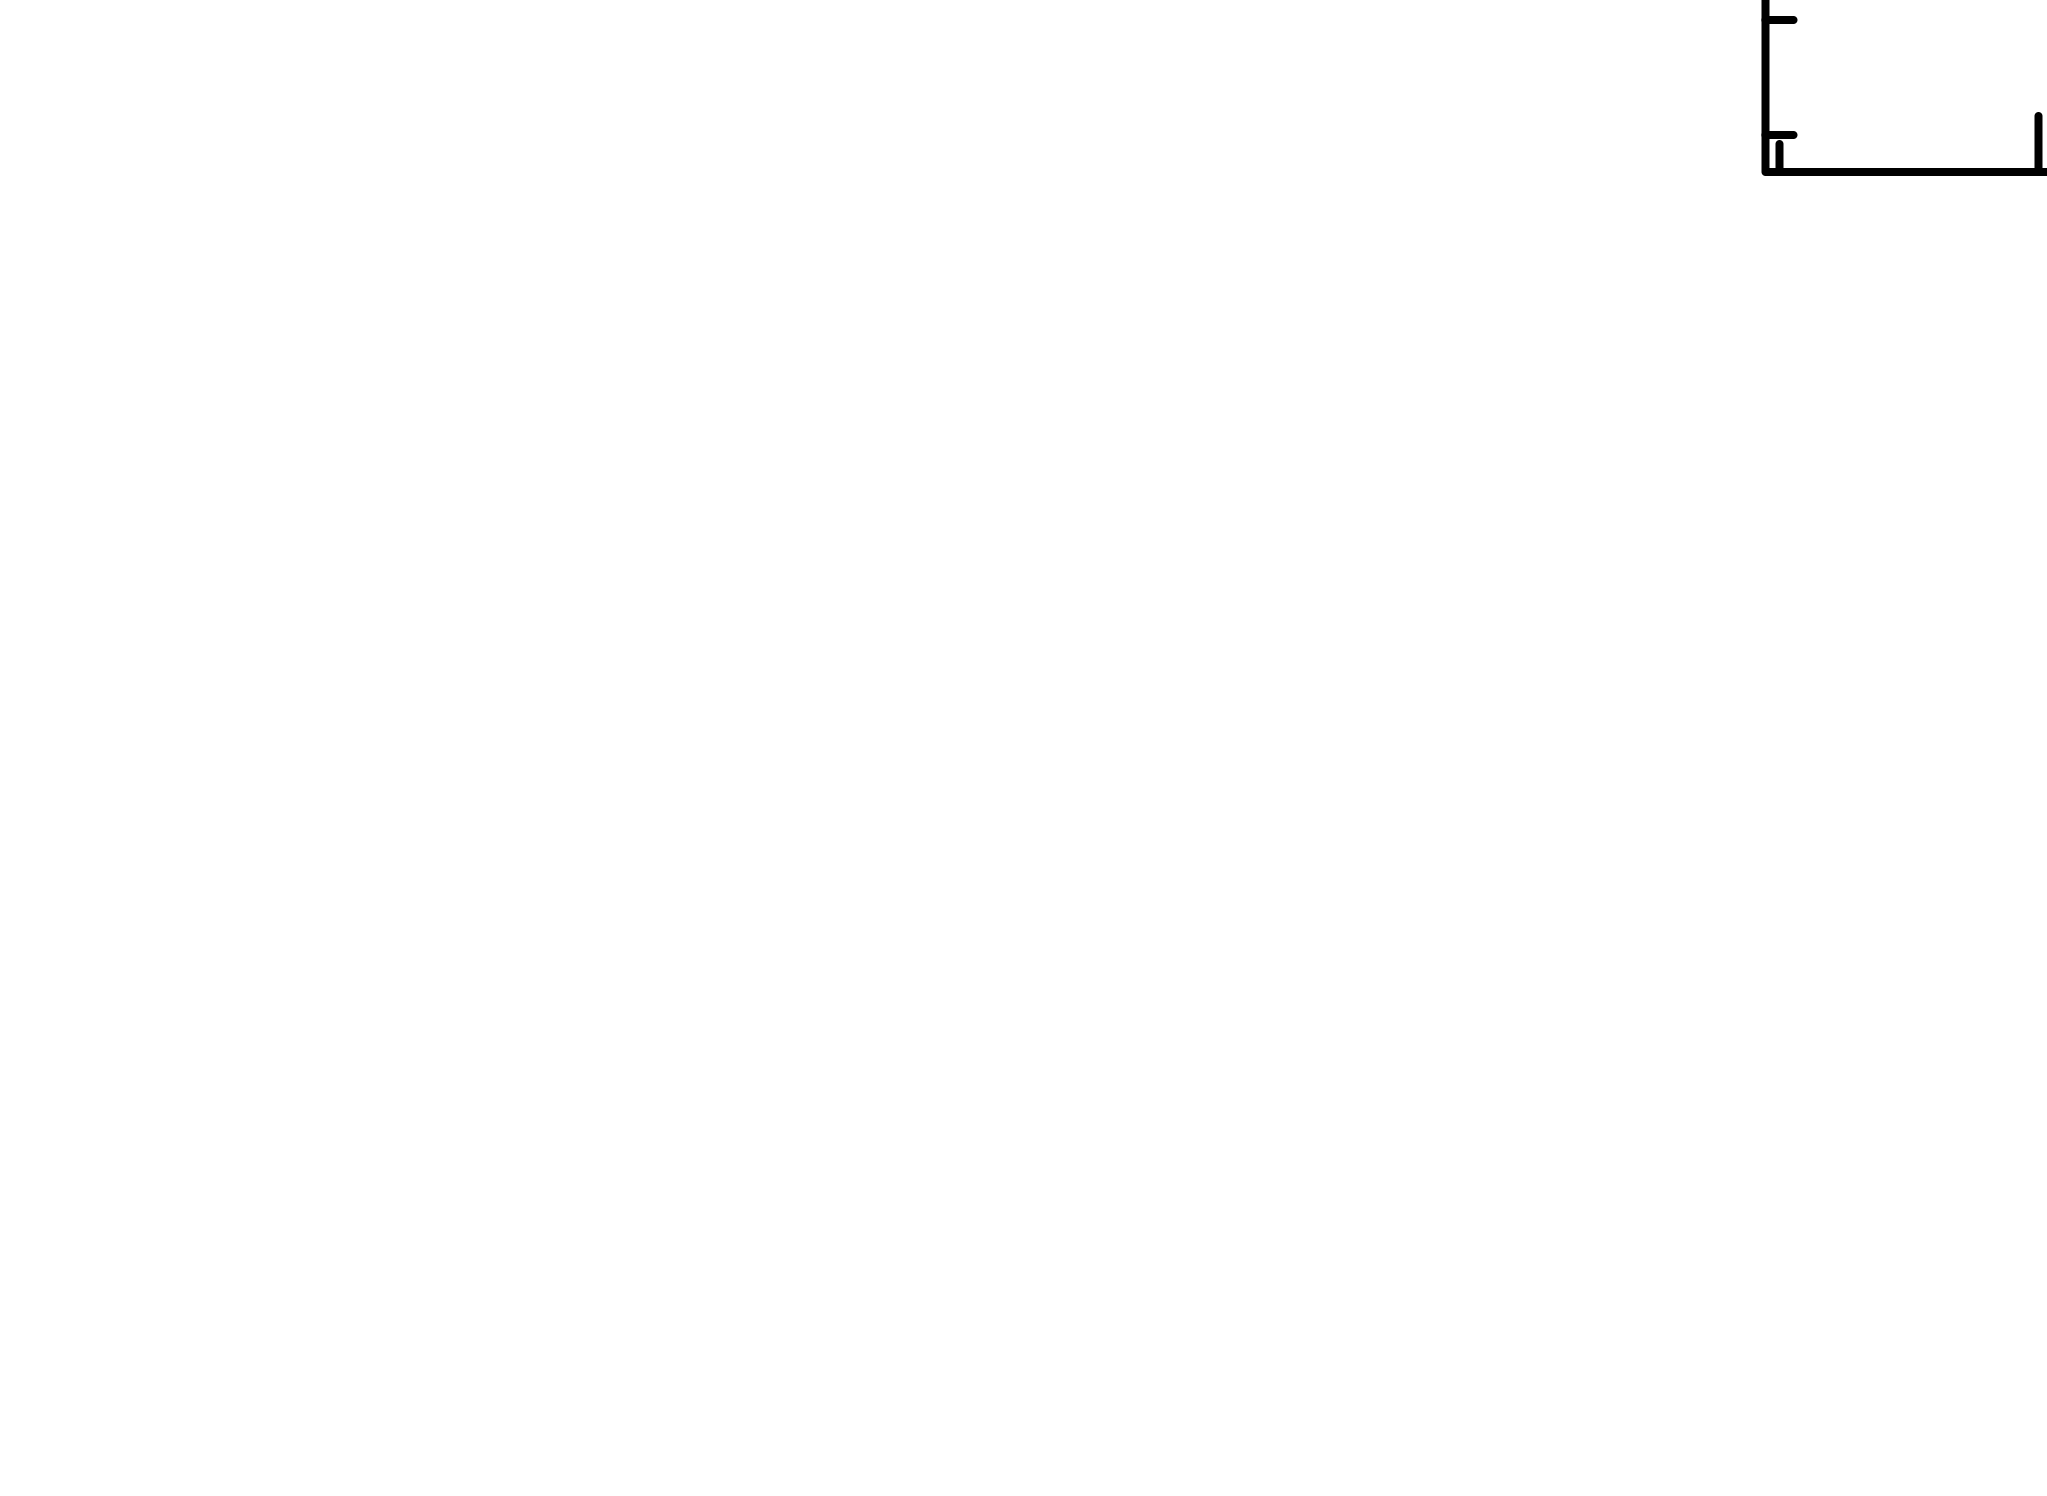

In [11]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
mo.apec.kT = 0.5
mo.apec_3.kT = 4
Fit.perform()
Plot("data resid")